# PCA para el análisis, visualización de datos, y entrenamiento de algoritmos de clasificación

## Tabla de Contenidos
1. Introducción
2. Importación de Datos
3. Preprocesar Datos
4. PCA <br/>
    4.1 Aplicación del PCA <br/>
    4.2 Análisis de resultados <br/>
    4.3 Visualización del PCA 2D <br/>
5. Detección de Outliers
6. Clasificación <br/>
    6.1 Clasificar <br/>
    6.2 Predicción y Análisis <br/>
    
    
## 1. Introducción
    
PCA es un algoritmo de reducción de dimensionalidad no supervisado. En este ejemplo lo emplearemos para satisfacer 3 objetivos:

**1. Hacer un análisis** <br/>
    Analizaremos la cantidad de componentes principales que son necesarios para resumir nuestros datos de una manera que no haya tanta pérdida de información. Este objetivo se establece únicamente como fase de experimentación.
    
**2. Facilitar la visualización de nuestros datos** <br/>
Ocuparemos 2 componentes principales para poder graficar nuestros datos multidimensionales en una gráfica de dispersión. Así podremos entender mejor nuestra data y podemos detectar posibles outliers.
    
**3. Como paso de preprocesamiento para la clasificación de elementos** <br/>
Por último ocuparemos PCA para resumir nuestros datos y eficientizar el entrenamiento de nuestro clasificador sin perder efectividad de clasificación.
        

## 2. Importación de Datos
El primer paso es importar los datos que ocuparemos para el análisis. El archivo de entrada debe ser un archivo de texto plano con el formato siguiente:
```
No. Elementos
No. Atributos
No. Clases
atrib_0, atrib_1, ..., atrib_n, clase
atrib_0, atrib_1, ..., atrib_n, clase
... ... ...
atrib_0, atrib_1, ..., atrib_n, clase
```

### Preprocesar archivo
Primero preprocesamos el archivo para obtener los metadatos de No. de elementos, atributos y clases que éste contiene en el encabezado y así construir nuestro dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

nombre_archivo = "data2"

In [2]:
try:
    with open( nombre_archivo + ".txt", "r") as archivo:
        nElem = int(archivo.readline())
        nAtrib = int(archivo.readline())
        nClases = int(archivo.readline())
        
        atributos = []
        for i in range(0, nAtrib):
            atributos.append("atrib_" + str(i+1))
        
        atributos.append("clase")
        data = pd.read_csv(archivo, delimiter=',', header=None)
        data.columns = atributos
    
except FileNotFoundError:
    print( "ERROR: El archivo " + nombre_archivo + " no fue encontrado");
finally:
    archivo.close();

dataset = data;

Podemos obtener un pequeño vistazo de cómo se ve nuestro dataset hasta ahora.

In [3]:
x_fin = dataset.drop('clase', 1)
y_fin = dataset['clase']
nComponentes = "Sin Componentes"

In [4]:
dataset.head()

,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,...,atrib_377,atrib_378,atrib_379,atrib_380,atrib_381,atrib_382,atrib_383,atrib_384,atrib_385,clase
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851,0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726,0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600,0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474,0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348,0


## 3. Preprocesar datos
Como PCA se soporta de la desviación estándar de los datos para calcular la nueva proyección de nuestros datos, una variable con una desviación estándar alta tendrá un peso mayor para el cálculo de la proyección que una variable con una desviación estándar baja. Si normalizamos los datos, todas las variables tendrán la misma desviación estándar, por lo tanto, el cálculo no estará cargado. 

Además, como no tenemos conocimiento del dominio del conjunto de datos de ejemplo, no sabemos si las unidades de medida de sus variables son distintas. Otra razón por la cual normalizar nuestros datos.

PCA se considera como un algoritmo no supervisado, esto quiere decir que se apoya únicamente del set de datos sin las clases asignadas. Por esto, el primer paso de preprocesamiento será dividir nuestro set en dos: el set con los atributos y el set de las clases de asignación. Paso continuo sería estandarizar los datos sin la columna de las clases.

In [5]:
x = dataset.drop('clase', 1)
y = dataset['clase']

x_estandarizada = StandardScaler().fit_transform(x)

try:
    atributos.remove('clase')
except:
    print('')
    
x_fin = pd.DataFrame(data = x_estandarizada, columns = atributos)
x_fin.head()

,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,...,atrib_376,atrib_377,atrib_378,atrib_379,atrib_380,atrib_381,atrib_382,atrib_383,atrib_384,atrib_385
0,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.398449,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.332086
1,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388748,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.339097
2,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388748,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.346107
3,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388748,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.353118
4,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388245,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.360128


## 4. PCA

### 4.1. Aplicar PCA
A continuación aplicaremos el PCA con tantos componentes principales como especifique el usuario.
Se calculan 2 por defecto para que a continuación podamos graficar nuestros datos.

In [6]:
nComponentes = int(input())
pca = PCA(n_components=nComponentes)

12


In [7]:
atributos = []
for i in range(nComponentes):
    atributos.append('PC'+ str(i+1))

In [8]:
x_pca = pca.fit_transform(x_estandarizada)
pca_dataframe = pd.DataFrame(data = x_pca, columns=atributos)

Una vez aplicado el PCA, podemos observar que las dimensiones se redujeron.

In [9]:
x_fin = pca_dataframe
x_fin.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,10.460596,-3.339109,-4.563161,3.327759,-2.208121,6.064103,-4.216890,-2.282480,2.566458,-0.184194,2.545967,1.755358
1,10.476073,-3.105652,-4.598310,3.396971,-2.553714,6.859681,-4.514791,-2.525036,2.475475,-0.264140,2.139360,1.485149
2,10.461930,-3.080342,-4.655892,3.387952,-2.533418,7.027484,-4.408574,-2.720884,2.408274,-0.350027,2.177446,1.629837
3,10.266744,-3.118854,-4.481004,3.101231,-2.716013,6.562618,-3.877002,-2.767032,2.268119,-0.407711,2.667307,2.427876
4,10.291467,-3.159250,-4.525222,3.179001,-2.780219,6.549292,-3.847466,-2.891800,2.291335,-0.392369,2.794697,2.533093


## 6. Clasificación
Tener una gran cantidad de atributos en un dataset afecta el rendimiento y la precisión de los algoritmos de clasificación. Nuestro dataset original contenía 19 atributos, los cuales, a través de la técnica de reducción de dimensionalidad de PCA, logramos reducir a 2.

En este ejemplo entrenaremos un árbol de decisión con nuestros datos reducidos con PCA. En seguida, analizaremos la precisión de éste cuando es entrenado con distintas cantidades de Componentes Principales. El objetivo es ver el número óptimo de Componentes Principales que nos permitan reducir el tiempo de entrenamiento del clasificador al resumir nuestros datos adecuadamente, y conservar un elevado porcentaje de precisión.

In [10]:
dataframe = pd.concat([x_fin, y_fin], axis = 1);

X = dataframe.drop('clase', 1)
y = dataframe['clase']


El método de clasificación por árbol de decisión es un método de aprendizaje supervisado, por esto, debemos entrenarlo con el set de atributos y su clasificación inicial. Además, para probar la precisión de éste, necesitamos un set de prueba. Por ello procederemos a partir nuestro set de datos en 2 secciones: Un set para entrenar a nuestro clasificador, y uno para entrenarlo.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Avance 2
Clasificación

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("******* CLASIFICADOR KNN *******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación: ")
print(classification_report(y_test, y_pred))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_test, y_pred))

******* CLASIFICADOR KNN *******

Matriz de confusión: 
[[11  1  0  0  0  0]
 [ 0 40  0  0  0  1]
 [ 0  1  9  0  2  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  6  2]
 [ 0  0  0  0  0 20]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.95      0.98      0.96        41
           2       1.00      0.75      0.86        12
           3       1.00      1.00      1.00         4
           4       0.75      0.75      0.75         8
           5       0.87      1.00      0.93        20

    accuracy                           0.93        97
   macro avg       0.93      0.90      0.91        97
weighted avg       0.93      0.93      0.93        97


Puntaje de precisión: 
0.9278350515463918


In [15]:
error = []

# Calcular error para valores K entre 1 y 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Promedio')

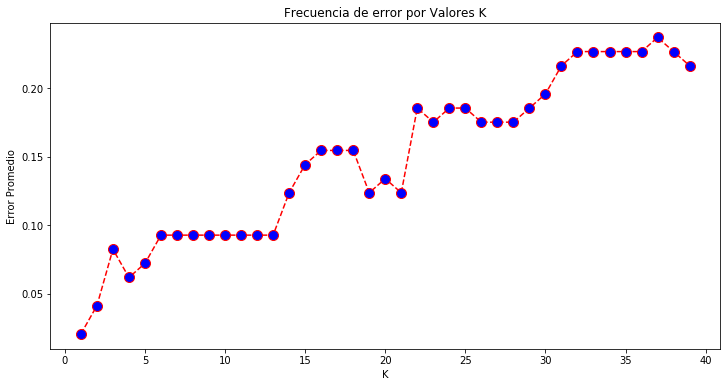

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Frecuencia de error por Valores K')
plt.xlabel('K')
plt.ylabel('Error Promedio')

## Neural Network

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=300)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.959 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.974 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.966 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.977 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.964 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.977 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

In [42]:
y_true, y_pred = y_test , clf.predict(X_test)

In [43]:
print("******* CLASIFICADOR NEURAL NET*******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación: ")
print(classification_report(y_test, y_pred))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_test, y_pred))

******* CLASIFICADOR NEURAL NET*******

Matriz de confusión: 
[[11  1  0  0  0  0]
 [ 0 41  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 20]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        20

    accuracy                           0.99        97
   macro avg       1.00      0.99      0.99        97
weighted avg       0.99      0.99      0.99        97


Puntaje de precisión: 
0.9896907216494846


## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB().fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [37]:
print("******* CLASIFICADOR NAIVE BAYES *******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación: ")
print(classification_report(y_test, y_pred))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_test, y_pred))

******* CLASIFICADOR NAIVE BAYES *******

Matriz de confusión: 
[[ 9  1  0  0  0  2]
 [ 1 39  0  0  0  1]
 [ 2  2  8  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  5  2]
 [ 0  1  0  0  0 19]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.89      0.95      0.92        41
           2       1.00      0.67      0.80        12
           3       1.00      1.00      1.00         4
           4       1.00      0.62      0.77         8
           5       0.79      0.95      0.86        20

    accuracy                           0.87        97
   macro avg       0.90      0.82      0.85        97
weighted avg       0.88      0.87      0.86        97


Puntaje de precisión: 
0.865979381443299
